# Introduction

each image can be divided into 7 x 7 = 49 images. Or randomly select 128 x 128 from 900 x 900 frame

In [6]:
print(128 * 7)
print(30 * 49)

896
1470


*References*   
https://www.kaggle.com/keegil/keras-u-net-starter-lb-0-277

# Preprocess training data

In [3]:
import numpy as np
import os

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH = "MoNuSeg Training Data/Tissue images/"
MASK_PATH = "mask_out/"

train_ids = [x[:-4] for x in os.listdir(TRAIN_PATH)]
mask_ids = [x[:-4] for x in os.listdir(MASK_PATH)]
print(len(train_ids), len(mask_ids))                                       

31 30


In [18]:
mask_ids[:5]

['TCGA-18-5592-01Z-00-DX1',
 'TCGA-21-5784-01Z-00-DX1',
 'TCGA-21-5786-01Z-00-DX1',
 'TCGA-38-6178-01Z-00-DX1',
 'TCGA-49-4488-01Z-00-DX1']

In [8]:
from tqdm import tqdm
from cv2 import imread
# error?
# from skimage.io import imread
import sys

IMG_WIDTH = 900
IMG_HEIGHT = 900
IMG_CHANNELS = 3
train_ids = mask_ids
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    img = imread(TRAIN_PATH + id_ + '.tif')[50:950,50:950,:IMG_CHANNELS]
    # img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask_ = np.load(MASK_PATH + id_ + '.npy')
    # Y_train[n] = np.reshape(np.ma.make_mask(mask_), (IMG_WIDTH, IMG_HEIGHT, 1))
    Y_train[n] = np.reshape(mask_, (IMG_WIDTH, IMG_HEIGHT, 1))

Getting and resizing train images and masks ... 


100%|██████████| 30/30 [00:00<00:00, 35.70it/s]


In [5]:
X_train.shape

(30, 900, 900, 3)

In [7]:
Y_train.shape

(30, 900, 900, 1)

### check train and mask pair

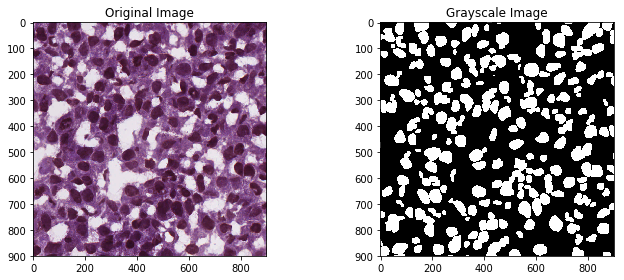

In [11]:
from matplotlib import pyplot as plt 

tis = X_train[15, :, :, :]
mask = Y_train[15, :, :, 0]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(tis)
# plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
# plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

### Split 900 x 900 to 128 x 128

In [16]:
# from tqdm import tqdm
from tqdm import tqdm_notebook
from cv2 import imread
# error?
# from skimage.io import imread
import sys

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
train_ids = mask_ids
X_train = np.zeros(((len(train_ids) * 49), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros(((len(train_ids) * 49), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print(X_train.shape)
print(Y_train.shape)

print('Getting and resizing train images and masks ... ')
sys.stdout.flush()

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids), position=0):
    img = imread(TRAIN_PATH + id_ + '.tif')[50:950,50:950,:IMG_CHANNELS]
    mask_ = np.load(MASK_PATH + id_ + '.npy')
    # img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    for m, (i,j) in enumerate([(x,y) for x in range(7) for y in range(7)]):  
        img_sub = img[(128 * i):(128 * i + 128), (128 * j):(128 * j + 128)]
        mask_sub = mask_[(128 * i):(128 * i + 128), (128 * j):(128 * j + 128)]
        X_train[n * 49 + m] = img_sub    
        Y_train[n * 49 + m] = np.reshape(mask_sub, (IMG_WIDTH, IMG_HEIGHT, 1))

print(X_train.shape)
print(Y_train.shape)

(1470, 128, 128, 3)
(1470, 128, 128, 1)
Getting and resizing train images and masks ... 


100%|██████████| 30/30 [00:00<00:00, 33.74it/s]

(1470, 128, 128, 3)
(1470, 128, 128, 1)


### Split 900 x 900 to 51 x 51, but not used

In [18]:
import sys

IMG_WIDTH = 51
IMG_HEIGHT = 51
IMG_CHANNELS = 3

nr = 17
n_img = 17 * 17
train_ids = mask_ids

X_train2 = np.zeros(((len(train_ids) * n_img), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train2 = np.zeros(((len(train_ids) * n_img), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Getting and resizing train images and masks ... ')
sys.stdout.flush()

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    img = imread(TRAIN_PATH + id_ + '.tif')[50:950,50:950,:IMG_CHANNELS]
    mask_ = np.load(MASK_PATH + id_ + '.npy')
    for m, (i,j) in enumerate([(x,y) for x in range(nr) for y in range(nr)]):  
        img_sub = img[(IMG_WIDTH * i):(IMG_WIDTH * i + IMG_WIDTH), (IMG_WIDTH * j):(IMG_WIDTH * j + IMG_WIDTH)]
        mask_sub = mask_[(IMG_WIDTH * i):(IMG_WIDTH * i + IMG_WIDTH), (IMG_WIDTH * j):(IMG_WIDTH * j + IMG_WIDTH)]
        X_train2[n * n_img + m] = img_sub    
        Y_train2[n * n_img + m] = np.reshape(mask_sub, (IMG_WIDTH, IMG_HEIGHT, 1))

print(X_train2.shape)
print(Y_train2.shape)

Getting and resizing train images and masks ... 


100%|██████████| 30/30 [00:01<00:00, 29.96it/s]

(8670, 51, 51, 3)
(8670, 51, 51, 1)


### Sanity check

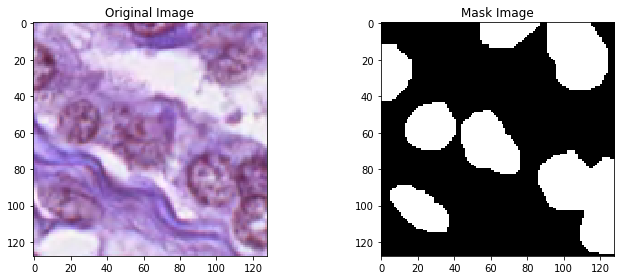

In [11]:
from matplotlib import pyplot as plt 

tis = X_train[1115, :, :, :]
mask = Y_train[1115, :, :, 0]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(tis)
# plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
# plt.axis('off')
plt.title('Mask Image')

plt.tight_layout()
plt.show()

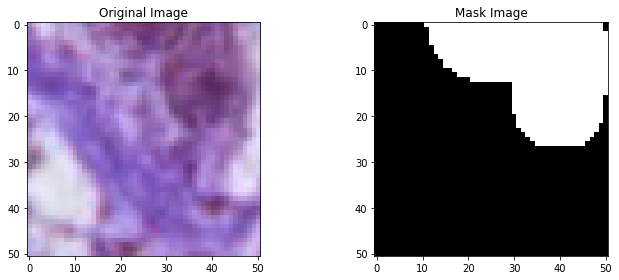

In [21]:
tis = X_train2[6115, :, :, :]
mask = Y_train2[6115, :, :, 0]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(tis)
# plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
# plt.axis('off')
plt.title('Mask Image')

plt.tight_layout()
plt.show()

In [75]:
for n, (i,j) in enumerate([(x,y) for x in range(3) for y in range(3)]):
    print(n, i, j)

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2


# CNN baseline

In [33]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, UpSampling2D, Lambda

In [35]:
simple_cnn = Sequential()
simple_cnn.add(BatchNormalization(input_shape = (None, None, IMG_CHANNELS), 
                                  name = 'NormalizeInput'))
simple_cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
simple_cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))

# use dilations to get a slightly larger field of view
simple_cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))

# the final processing
simple_cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
simple_cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
simple_cnn.compile(optimizer = 'adam', loss = dice_coef_loss, 
                   # metrics = [dice_coef, 'acc', 'mse']
                   metrics = [dice_coef])
simple_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, None, None, 8)     224       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, None, None, 8)     584       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, None, None, 16)    528       
__________

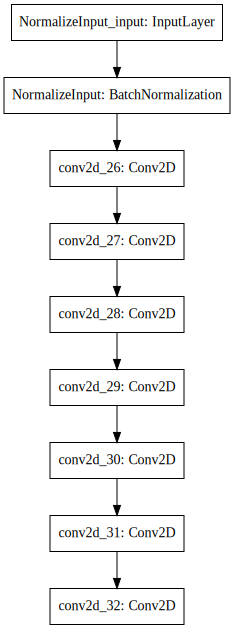

In [40]:
import pydot
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

# plot_model(simple_cnn, to_file='graph_cnn2.png', show_shapes=True, rankdir='LR')
plot_model(simple_cnn, to_file='graph_cnn.png')
SVG(model_to_dot(simple_cnn).create(prog='dot', format='svg'))

In [22]:
from keras import backend as K
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [42]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
print(train_x.shape)
print(test_x.shape)

(1029, 128, 128, 3)
(441, 128, 128, 3)


In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('model-cnn.h5', verbose=1, save_best_only=True)
results = simple_cnn.fit(train_x, train_y, validation_split=0.3, batch_size=64, epochs=10, verbose=1,
                    callbacks=[earlystopper, checkpointer])

Train on 720 samples, validate on 309 samples
Epoch 1/10
720/720 [==============================] - 46s 64ms/step - loss: 0.2898 - dice_coef: 0.7102 - val_loss: 0.3443 - val_dice_coef: 0.6557
Epoch 2/10
720/720 [==============================] - 49s 69ms/step - loss: 0.2905 - dice_coef: 0.7095 - val_loss: 0.3294 - val_dice_coef: 0.6706
Epoch 3/10
720/720 [==============================] - 50s 70ms/step - loss: 0.2902 - dice_coef: 0.7098 - val_loss: 0.3185 - val_dice_coef: 0.6815
Epoch 4/10
720/720 [==============================] - 47s 65ms/step - loss: 0.2897 - dice_coef: 0.7103 - val_loss: 0.3094 - val_dice_coef: 0.6906
Epoch 5/10
720/720 [==============================] - 48s 67ms/step - loss: 0.2908 - dice_coef: 0.7092 - val_loss: 0.3022 - val_dice_coef: 0.6978
Epoch 6/10
720/720 [==============================] - 46s 64ms/step - loss: 0.2890 - dice_coef: 0.7110 - val_loss: 0.2974 - val_dice_coef: 0.7026
Epoch 7/10
720/720 [==============================] - 50s 69ms/step - loss: 0.

# U-Net

In [54]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# s = Lambda(lambda x: x / 255) (inputs)
s = BatchNormalization()(inputs)


c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 3)  12          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 128, 128, 8)  224         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 128, 128, 8)  584         conv2d_52[0][0]                  
__________________________________________________________________________________________________
max_poolin

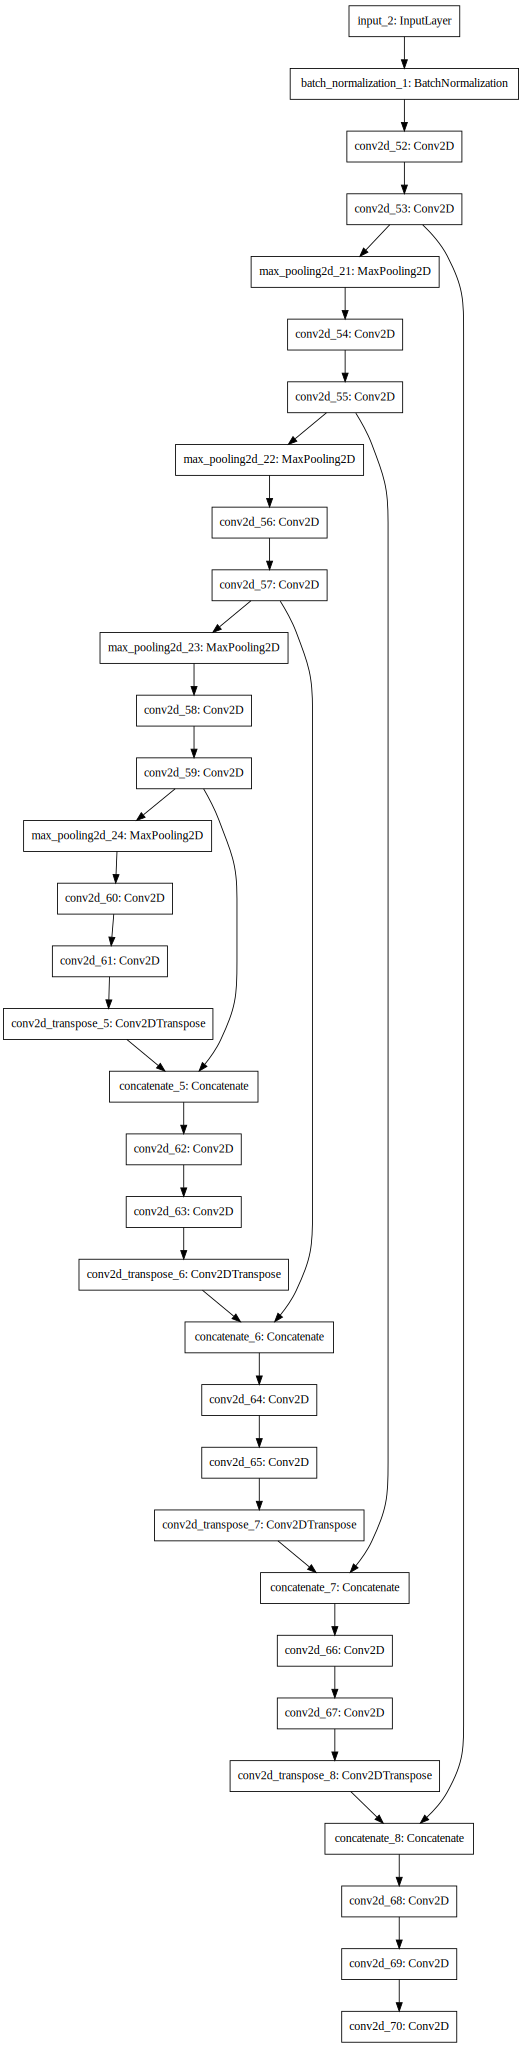

In [58]:
# plot_model(simple_cnn, to_file='graph_cnn2.png', show_shapes=True, rankdir='LR')
plot_model(model, to_file='graph_unet.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [56]:
# Fit model
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('model-unet.h5', verbose=1, save_best_only=True)

results = model.fit(train_x, train_y, validation_split=0.3, batch_size=8, epochs=10, 
                    callbacks=[earlystopper, checkpointer])

Train on 720 samples, validate on 309 samples
Epoch 1/10
720/720 [==============================] - 59s 81ms/step - loss: 0.4625 - dice_coef: 0.5462 - val_loss: 0.7095 - val_dice_coef: 0.4142
Epoch 2/10
720/720 [==============================] - 59s 82ms/step - loss: 0.3994 - dice_coef: 0.6188 - val_loss: 0.4099 - val_dice_coef: 0.5994
Epoch 3/10
720/720 [==============================] - 60s 83ms/step - loss: 0.3672 - dice_coef: 0.6496 - val_loss: 0.3353 - val_dice_coef: 0.7151
Epoch 4/10
720/720 [==============================] - 61s 85ms/step - loss: 0.3366 - dice_coef: 0.6846 - val_loss: 0.3195 - val_dice_coef: 0.7088
Epoch 5/10
720/720 [==============================] - 67s 93ms/step - loss: 0.3113 - dice_coef: 0.7089 - val_loss: 0.3435 - val_dice_coef: 0.7038
Epoch 6/10
720/720 [==============================] - 65s 90ms/step - loss: 0.3044 - dice_coef: 0.7141 - val_loss: 0.2953 - val_dice_coef: 0.7330
Epoch 7/10
720/720 [==============================] - 72s 100ms/step - loss: 0

## Validate on testing data

In [57]:
loss, dice = model.evaluate(test_x, test_y, verbose = 1, batch_size = 64)
print("UNet model")
print("score: %.3f" % (loss))
print("acc: %.3f" % (dice))

loss, dice = simple_cnn.evaluate(test_x, test_y, verbose = 1, batch_size = 64)
print("CNN model")
print("score: %.3f" % (loss))
print("acc: %.3f" % (dice))

441/441 [==============================] - 12s 28ms/step
UNet model
score: 0.296
acc: 0.713
441/441 [==============================] - 12s 28ms/step
CNN model
score: 0.309
acc: 0.691


# U-Net with Augmentation

In [64]:
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# s = Lambda(lambda x: x / 255) (inputs)
s = BatchNormalization()(inputs)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
# model.summary()

In [65]:
# Fit model
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('model-unet-aug.h5', verbose=1, save_best_only=True)

# model.fit(train_x, train_y, validation_split=0.3, batch_size=8, epochs=10, verbose = 2, 
#                    callbacks=[earlystopper, checkpointer])

In [61]:
train_x1, test_x2, train_y1, test_y2 = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
print(train_x1.shape)
print(test_x2.shape)

(720, 128, 128, 3)
(309, 128, 128, 3)


In [68]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # rescale=1./255,
    # rotation_range=90,
    # width_shift_range=.15,
    # height_shift_range=.15,
    vertical_flip=True,
    horizontal_flip=True)

datagen.fit(train_x, augment=True)

batch_size = 8
history = model.fit_generator(datagen.flow(train_x1, train_y1, batch_size=batch_size, seed= 20),
                        steps_per_epoch=train_x.shape[0] // batch_size,
                        epochs=10, validation_data=(test_x2, test_y2), verbose = 2,
                        callbacks=[earlystopper] )

Epoch 1/10
 - 82s - loss: 0.6095 - dice_coef: 0.3702 - val_loss: 0.5201 - val_dice_coef: 0.4034
Epoch 2/10
 - 78s - loss: 0.5992 - dice_coef: 0.3828 - val_loss: 0.5115 - val_dice_coef: 0.4292
Epoch 3/10
 - 79s - loss: 0.6046 - dice_coef: 0.3792 - val_loss: 0.5095 - val_dice_coef: 0.4202
Epoch 4/10
 - 80s - loss: 0.6057 - dice_coef: 0.3778 - val_loss: 0.5251 - val_dice_coef: 0.4179
Epoch 5/10
 - 75s - loss: 0.6023 - dice_coef: 0.3840 - val_loss: 0.5068 - val_dice_coef: 0.4396
Epoch 6/10
 - 75s - loss: 0.5966 - dice_coef: 0.3829 - val_loss: 0.4953 - val_dice_coef: 0.4313
Epoch 7/10
 - 80s - loss: 0.6059 - dice_coef: 0.3824 - val_loss: 0.5039 - val_dice_coef: 0.4359
Epoch 8/10
 - 83s - loss: 0.5979 - dice_coef: 0.3844 - val_loss: 0.4928 - val_dice_coef: 0.4396
Epoch 9/10
 - 87s - loss: 0.6068 - dice_coef: 0.3787 - val_loss: 0.4919 - val_dice_coef: 0.4409
Epoch 10/10
 - 83s - loss: 0.5982 - dice_coef: 0.3858 - val_loss: 0.5230 - val_dice_coef: 0.4319


In [67]:
loss, dice = model.evaluate(test_x, test_y, verbose = 1, batch_size = 64)
print("UNet model")
print("score: %.3f" % (loss))
print("acc: %.3f" % (dice))

441/441 [==============================] - 12s 28ms/step
UNet model
score: 0.553
acc: 0.395


Image data augmentation doesnot work in this case. Need further exploration. Stay tuned. 